### SupportVectorForSVR Regression

#### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }<style>"))

#### Import dataset

In [3]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


#### Separate X features & y labels

In [4]:
X = df.drop('sales', axis=1).values
y = df['sales'].values

In [5]:
X[0], y[0]

(array([230.1,  37.8,  69.2]), 22.1)

#### Encode categorical data
there isn't one

#### Turn Y into 2D

In [6]:
y = y.reshape(len(y), 1)
y[0]

array([22.1])

#### Split Training/Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_train[0], X_test[0], y_train[0], y_test[0] 

(array([36.9, 38.6, 65.6]),
 array([69.2, 20.5, 18.3]),
 array([10.8]),
 array([11.3]))

#### Feature Scaling (Standard Scaler)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

X_test = sc_X.transform(X_test)

#### Train Model

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train.ravel())

SVR()

#### Test Model

In [11]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

In [12]:
new_df = pd.DataFrame({'y_test': y_test.flatten(), 'y_pred': y_pred.flatten().round(1)})
new_df

,y_test,y_pred
0,11.3,10.7
1,8.4,8.3
2,8.7,9.3
3,25.4,25.0
4,11.7,11.9
5,8.7,8.2
6,7.2,9.8
7,13.2,13.0
8,9.2,9.1
9,16.6,16.5


#### Evaluate the Model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(new_df['y_test'], new_df['y_pred']).round(5)
mse = mean_squared_error(new_df['y_test'], new_df['y_pred']).round(5)
rmse = np.sqrt(mse).round(5)

r2 = r2_score(new_df['y_test'], new_df['y_pred']).round(7)

n = X.shape[0]
k = X.shape[1]
r2_adj = round((1-(1-r2)*(n-1)/(n-k-1)),7)

print(f"Mean Absolute Error: {mae}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error Error: {rmse}")

print(f"R2: {r2}")
print(f"R2 adjusted: {r2_adj}")

Mean Absolute Error: 0.63
Mean Squared Error: 1.6215
Root Mean Squared Error Error: 1.27338
R2: 0.9484738
R2 adjusted: 0.9476851


<span style="text-decoration: underline;">Linear Regression results:</span>


- Mean Squared Error: 4.41375
- Root Mean Squared Error: 2.10089
- R-squared: 0.8597449
- R-squared adjusted: 0.8575981


<span style="text-decoration: underline;">Polynomial Regression results:</span>
- Mean Squared Error: 0.90325
- Root Mean Squared Error: 0.9503947
- Mean Absolute Error: 0.90325
- R2: 0.9712976
- R2 adjusted: 0.9626868


SVR is worse than Polynomial, but much better than Linear

#### Visual

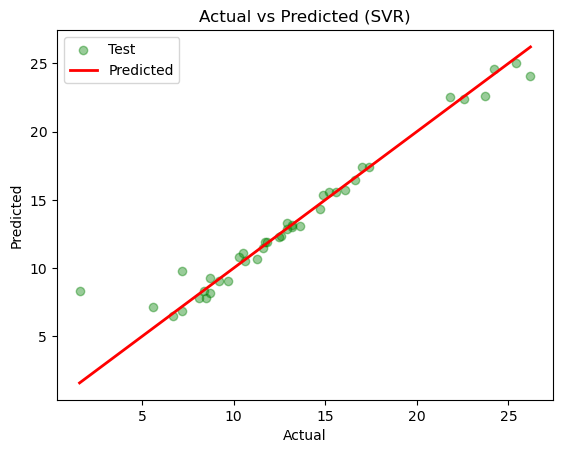

In [14]:
# Scatter plot for training data
#plt.scatter(y_train, regressor.predict(X_train), color='blue', label='Train', alpha = 0.5)
plt.scatter(y_test, y_pred, color='green', label='Test', alpha = 0.4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (SVR)')
plt.legend()
plt.show()

#### Predict new data

In [17]:
y_pred = regressor.predict(sc_X.transform([[20, 40, 80]]))
sc_y.inverse_transform(y_pred.reshape(-1,1))

array([[9.5644611]])